In [1]:
import pandas as pd
datos = pd.read_csv("train.csv")

In [2]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

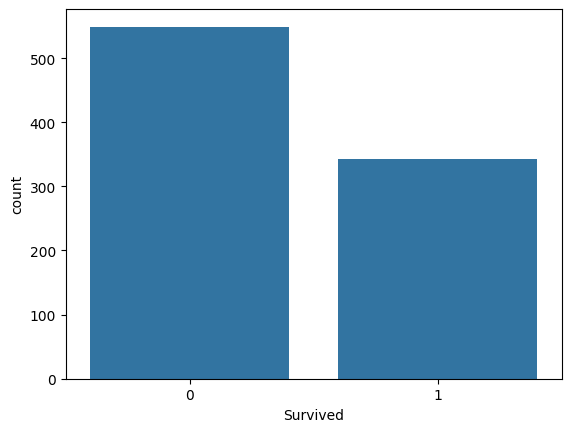

In [4]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

<Axes: xlabel='Survived', ylabel='count'>

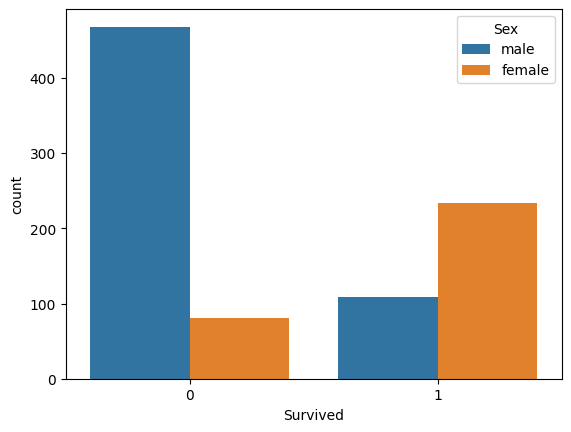

In [5]:
import seaborn as sb
sb.countplot(x="Survived", data=datos, hue="Sex")

In [6]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

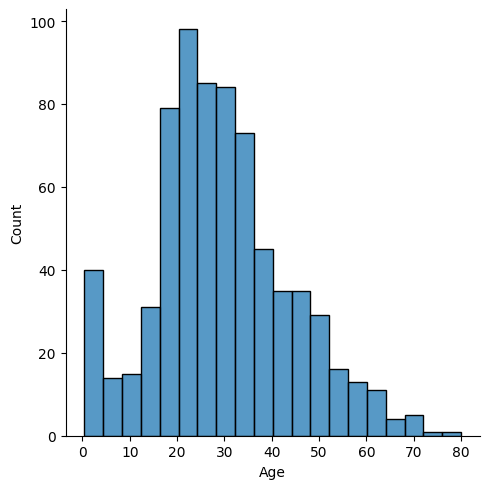

In [7]:
sb.displot(x="Age", data=datos)

In [8]:
datos["Age"].mean()

29.69911764705882

In [9]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [10]:
datos["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [11]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
datos = datos.drop(["Cabin"], axis=1)

In [13]:
datos["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
datos = datos.dropna()

In [15]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [17]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)

In [18]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

In [19]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


<Axes: xlabel='Survived', ylabel='count'>

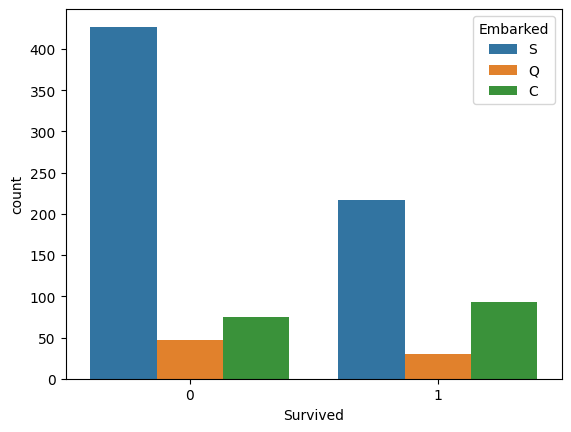

In [20]:
sb.countplot(x="Survived", data = datos, hue="Embarked")

In [21]:
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first = True)

In [22]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

In [23]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

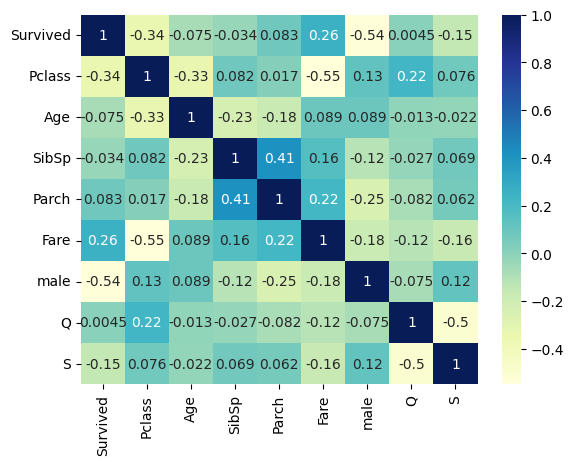

In [24]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

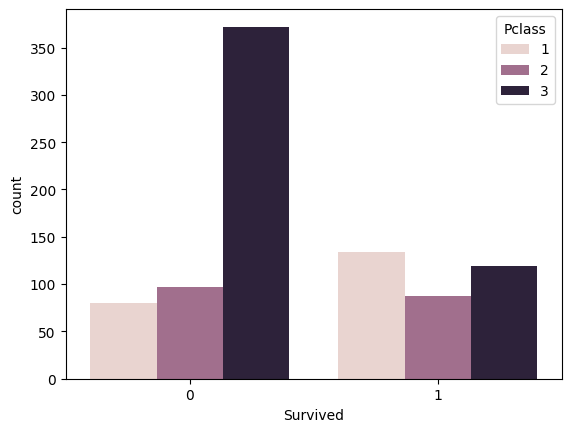

In [25]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [26]:
x = datos.drop(["Survived"], axis= 1)
y = datos["Survived"]

In [27]:
from sklearn.model_selection import train_test_split
x_ent, x_pru, y_ent, y_pru = train_test_split(x, y, test_size=.2)

In [39]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_ent, y_ent)
predicciones = modelo.predict(x_pru)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7528089887640449

In [37]:
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1, 20):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(x_ent, y_ent)
  predicciones = modelo.predict(x_pru)
  exactitud = accuracy_score(y_pru, predicciones)
  print(f"Resultado para {i}: {exactitud}")
  resultados.append(exactitud)

Resultado para 1: 0.8089887640449438
Resultado para 2: 0.8089887640449438
Resultado para 3: 0.8258426966292135
Resultado para 4: 0.8089887640449438
Resultado para 5: 0.8202247191011236
Resultado para 6: 0.8089887640449438
Resultado para 7: 0.8202247191011236
Resultado para 8: 0.8089887640449438
Resultado para 9: 0.8033707865168539
Resultado para 10: 0.8202247191011236
Resultado para 11: 0.7921348314606742
Resultado para 12: 0.8033707865168539
Resultado para 13: 0.7921348314606742
Resultado para 14: 0.7865168539325843
Resultado para 15: 0.7528089887640449
Resultado para 16: 0.7808988764044944
Resultado para 17: 0.7808988764044944
Resultado para 18: 0.7640449438202247
Resultado para 19: 0.7528089887640449


<Axes: >

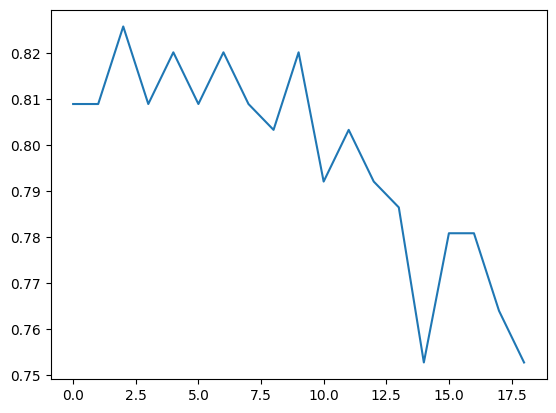

In [38]:
sb.lineplot(data=resultados)

In [40]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=5)
modelo.fit(x_ent, y_ent)
predicciones = modelo.predict(x_pru)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       126
           1       0.71      0.65      0.68        52

    accuracy                           0.82       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.82      0.82      0.82       178



[Text(0.46511627906976744, 0.9166666666666666, 'male <= 0.5\n0.482\n711\n[423, 288]\nMurio'),
 Text(0.2558139534883721, 0.75, 'Pclass <= 2.5\n0.375\n264\n[66, 198]\nVivio'),
 Text(0.10465116279069768, 0.5833333333333334, 'Age <= 2.5\n0.103\n147\n[8, 139]\nVivio'),
 Text(0.046511627906976744, 0.4166666666666667, 'Parch <= 1.5\n0.5\n2\n[1, 1]\nMurio'),
 Text(0.023255813953488372, 0.25, '0.0\n1\n[0, 1]\nVivio'),
 Text(0.06976744186046512, 0.25, '0.0\n1\n[1, 0]\nMurio'),
 Text(0.16279069767441862, 0.4166666666666667, 'Fare <= 26.125\n0.092\n145\n[7, 138]\nVivio'),
 Text(0.11627906976744186, 0.25, 'Age <= 56.0\n0.215\n49\n[6, 43]\nVivio'),
 Text(0.09302325581395349, 0.08333333333333333, '0.187\n48\n[5, 43]\nVivio'),
 Text(0.13953488372093023, 0.08333333333333333, '0.0\n1\n[1, 0]\nMurio'),
 Text(0.20930232558139536, 0.25, 'Fare <= 149.035\n0.021\n96\n[1, 95]\nVivio'),
 Text(0.18604651162790697, 0.08333333333333333, '0.0\n81\n[0, 81]\nVivio'),
 Text(0.23255813953488372, 0.08333333333333333, '

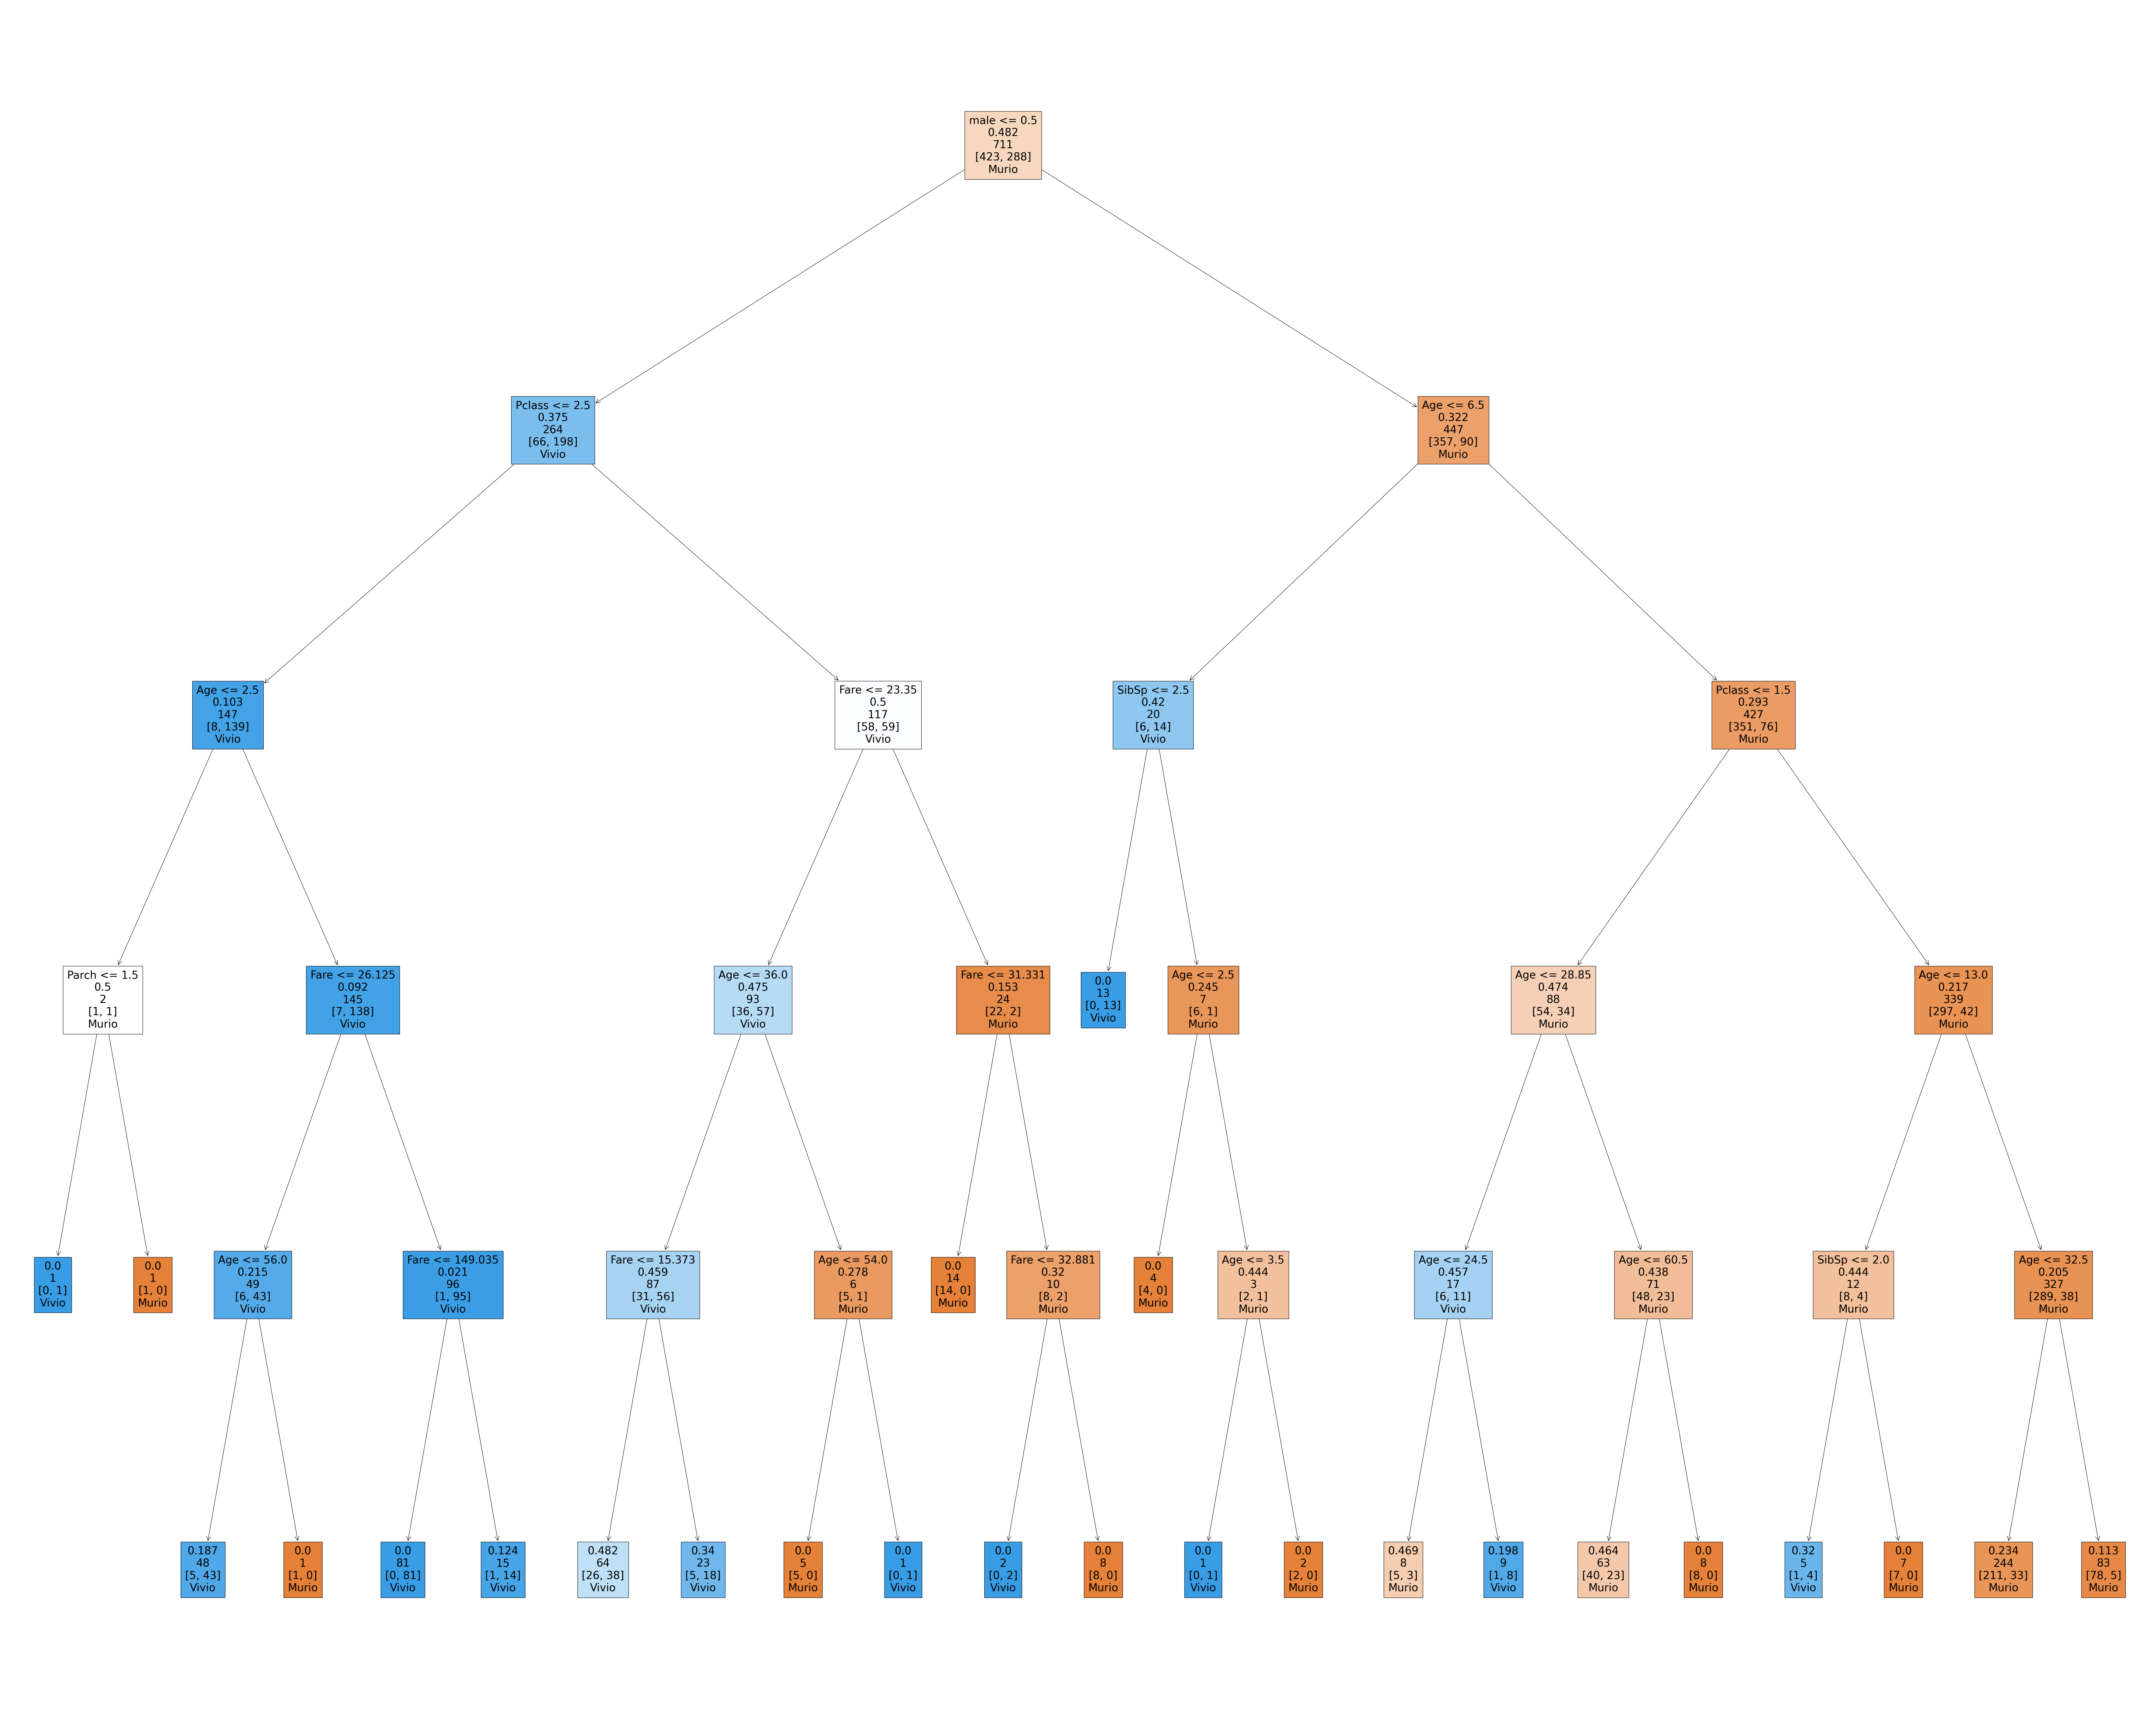

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names=x_ent.columns,
    class_names=["Murio", "Vivio"],
    filled = True,
    label = "none"
)